# Namaste 2 example

Here is a short readable (and copy-and-pastable) example as to how to use Namaste 2 to fit a single transit.

In [1]:
from namaste import *
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Initialising the star

In [3]:
#Using 203311200 (from Osborn 2016) as a test case
st=namaste.Star('203311200',namaste.Settings(nsteps=1000,nthreads=4,mission='K2'))

2018-10-20 17:27:52,259 INFO 115:namaste.py(50345) - 203311200 - initialising Star object


In [4]:
#Can add data directly here:
st.addRad(2.024,0.176)#solar
st.addMass(1.33,0.35)#solar 
st.addTeff(6088,250)#K

#Caculates density:
st.addDens()

[1.88537258 2.11493695 2.11214524 ... 2.02421088 2.28108478 1.97840447]


In [9]:
#Or you can use a csv file, for example:
st.csvfile_dat('ExampleData/EPIC203311200_beststelpars.csv')
#st.addLightcurve('/Volumes/CHEOPS/K2_MONOS/BestLCs/EPIC203311200_bestlc_ev.npy')

2018-10-19 16:57:02,989 INFO 149:namaste.py(48978) - 203311200 - Getting information from csv
/Users/hosborn/Postdoc/K2/Namaste_2/namaste/namaste.py:151: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df=pd.DataFrame.from_csv(file)


In [5]:
#Saving the star
st.SaveAll(overwrite=True)

In [7]:
#We need to use Teff and Logg information to initialise Limb Darkening (default: Kepler)
st.initLD()

To change settings use the st.settings approach

In [8]:
st.settings.printall()

{'GP': True, 'nopt': 25, 'nsteps': 12500, 'npdf': 6000, 'nwalkers': 24, 'nthreads': 8, 'ndurswindow': 6, 'anomcut': 3.75, 'fitsloc': './FitsFiles/', 'outfilesloc': './Outputs/', 'cadence': 0.0204318, 'kernel': 'quasi', 'verbose': True, 'mission': 'K2', 'fit_tdur': False, 'fit_vel': True}


In [9]:
#eg change number of steps in mcmc:
st.settings.update(nsteps=8000)
#or the "sigma" at which to cut anomalies:
st.settings.update(anomcut=4.5)
#Not doing a GP!
st.settings.update(GP=True)
st.settings.update(kernel='Real')

### Adding a lightcurve:

In [10]:
st.addLightcurve('ExampleData/EPIC203311200_bestlc_ev.npy')

(3515, 3)


/Users/hosborn/Postdoc/K2/Namaste_2/namaste/namaste.py:1279: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  kicdat=pd.DataFrame.from_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2targets&where=epic_number=%27"+str(int(kic))+"%27")


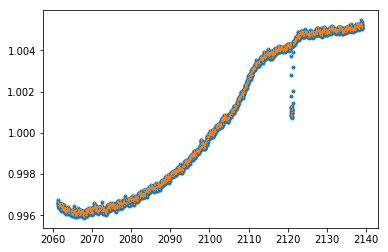

In [11]:
plt.plot(st.Lcurve.lc[:,0],st.Lcurve.lc[:,1],'.')
plt.plot(st.Lcurve.lc[st.Lcurve.lcmask,0],st.Lcurve.lc[st.Lcurve.lcmask,1],',')

### Initialising the GP:

This uses Celerite. For the moment, only the quasi-periodic stellar rotation kernel is working, but I hope to update this to include "no GP" and "ExpSq" in the future.

In [12]:
# Can set 'kernel' in settings as "quasi" or "Real"
st.settings.update(kernel='Real')
st.addGP()

#This then optimizes the hyperparameters using the lightcurve (and the out-of-transit regions, if a transit has been specified)
st.Optimize_GP()

2018-10-20 17:28:45,468 INFO 273:namaste.py(50345) - 203311200 - Adding GP
2018-10-20 17:28:45,470 INFO 317:namaste.py(50345) - 203311200 - optimizing GP
2018-10-20 17:28:45,472 DEBUG 324:namaste.py(50345) - 203311200 -  nans in y: 0
2018-10-20 17:28:45,473 INFO 273:namaste.py(50345) - 203311200 - Adding GP
2018-10-20 17:28:45,476 DEBUG 336:namaste.py(50345) - 203311200 - vect: -11.336742338080384,-1.0986122886681098,-9.820292730981462,1.0
2018-10-20 17:28:45,477 DEBUG 337:namaste.py(50345) - 203311200 - bounds: (-20 | 0.0) , (-3 | 4.5) , (-10.070292730981462 | -9.570292730981462) , (None | None)
2018-10-20 17:28:45,479 DEBUG 338:namaste.py(50345) - 203311200 - nll: -23926.522504281405
2018-10-20 17:28:46,149 DEBUG 342:namaste.py(50345) - 203311200 - init GP lpp is -27164.518253648836 using -11.173711928073937 , -4.628798986109649 , -11.002086462337118 , 1.0002511281605315


[-11.11445156  -3.94367426  -9.82029273   1.        ]
[-10.12768949  -4.39531862  -9.82029273   1.        ]
[-10.86746422  -3.532824    -9.82029273   1.        ]
[-20.9264629   -4.62603646  -9.82029273   1.        ]
[-12.62252576  -7.35650158  -9.82029273   1.        ]
[-12.87561966  -6.27727439  -9.82029273   1.        ]
[-9.75885248 -8.28508575 -9.82029273  1.        ]
[-12.16161999  -5.8645028   -9.82029273   1.        ]
[-9.76573952 -4.08735301 -9.82029273  1.        ]
[-19.50983541  -1.53260342  -9.82029273   1.        ]
[-11.8709396   -5.78398954  -9.82029273   1.        ]
[-14.27466781  -6.17675079  -9.82029273   1.        ]
[-10.03674038  -7.53929516  -9.82029273   1.        ]
[-14.17585205  -1.48706484  -9.82029273   1.        ]
[-13.61488336  -4.01754256  -9.82029273   1.        ]
[-11.24218682  -1.3932127   -9.82029273   1.        ]
[-8.97247254 -5.60273944 -9.82029273  1.        ]
[-8.8919306  -6.18234115 -9.82029273  1.        ]
[-18.36649055  -5.97122629  -9.82029273   1.

### Adding and initialising the Monotransit

So we have set up our star, importantly with the density included. Now we must add a monotransit. This is set up such that multiple monotransits can be added (although I have yet to check this feature).

The format is $t_{\rm cen}$, $b$, and $R_p/R_s$

monopriors: {'mean:tcen': [2120.87, 2121.17], 'mean:b': [0.0, 1.25], 'mean:vel': [0, 4.621799277795926, 'normlim', 2.735973080443852, 0.3771652394704148], 'mean:RpRs': [0.02, 0.25], 'mean:LD1': [0, 1.0, 'gaussian', 0.3391817964001663, 0.036441495445950725], 'mean:LD2': [0, 1.0, 'gaussian', 0.2932210147044807, 0.01997738037265819]}
nll init 2279.474178305063
Best_Result: [2.12102399e+03 7.89724378e-01 2.60265457e+00 5.85060816e-02
 1.29489612e-01 2.93258908e-01 1.10934273e+03]
initial fit nll:  2279.474178305063  to new fit nll:  1109.342726123128


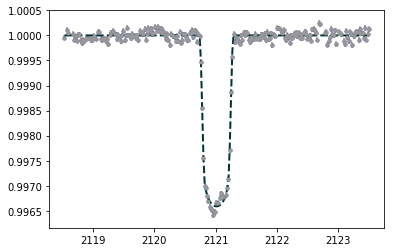

In [13]:
#Adds this to mono1
st.AddMonotransit(2121.02,0.5,0.0032,name='mono1')

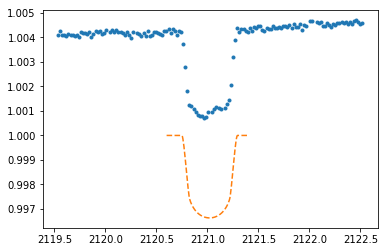

In [14]:
#Accessing pure transit fit:

st.BuildMeanModel()
model=st.meanmodel_comb.get_value(np.arange(2120.6,2121.4,0.005))
plt.plot(st.Lcurve.lc[abs(st.Lcurve.lc[:,0]-st.mono1.tcen)<1.5,0],st.Lcurve.lc[abs(st.Lcurve.lc[:,0]-st.mono1.tcen)<1.5,1],'.')
plt.plot(np.arange(2120.6,2121.4,0.005),model,'--')

### Running a model MCMC

In [18]:
#Now we have our mean-functions (eg transit models) added, we need to build the priors and the model:
st.BuildMeanPriors()
st.BuildMeanModel()

In [15]:
# Then we need the combine the kernel we've optimised with the monotransit mean model into a Celerite GP:
import celerite

st.gp=celerite.GP(kernel=st.kern,mean=st.meanmodel_comb,fit_mean=True)

In [16]:
# Now we need to build all the priors (not just the mean functions)

st.BuildAllPriors(st.gp.get_parameter_names())

{'kernel:terms[0]:log_a': [-20, 0.0], 'kernel:terms[0]:log_c': [-3, 4.5], 'mean:tcen': [2120.87, 2121.17], 'mean:b': [0.0, 1.25], 'mean:vel': [0, 4.621799277795926, 'normlim', 2.735973080443852, 0.3771652394704148], 'mean:RpRs': [0.02, 0.25], 'mean:LD1': [0, 1.0, 'gaussian', 0.3391817964001663, 0.036441495445950725], 'mean:LD2': [0, 1.0, 'gaussian', 0.2932210147044807, 0.01997738037265819]}


In [17]:
# Making walkers initial positions
chx=np.random.choice(st.settings.npdf,st.settings.nwalkers,replace=False)

#Tidying up so that the Celerite priors match our prior names
st.fitdict.update({'mean:'+nm:getattr(st.mono1,nm+'s')[chx] for nm in ['tcen','b','vel','RpRs']})
st.fitdict.update({'mean:'+nm:getattr(st,nm+'s')[chx] for nm in ['LD1','LD2']})


In [18]:
#Removing medians:
for row in st.fitdict:
    st.fitdict[row][np.isnan(st.fitdict[row])]=np.nanmedian(np.isnan(st.fitdict[row]))
dists=[st.fitdict[cname] for cname in st.gp.get_parameter_names()]
st.init_mcmc_params=np.column_stack(dists)


In [19]:
#Masking an arbitrary region around the transit for analysis (2.75d in this case)
mask=abs(st.Lcurve.lc[:,0]-st.gp.get_parameter('mean:tcen'))<2.75


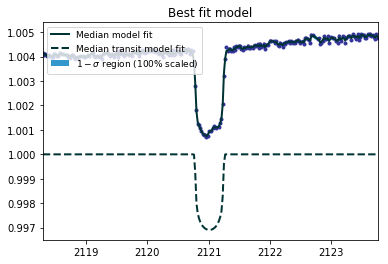

In [21]:
# Doing an initial fit with PlotModel:

_=namaste.PlotModel(st.Lcurve.lc[mask,:], st.gp, np.median(st.init_mcmc_params,axis=0), fname=st.settings.outfilesloc+st.objname+'_initfit.png',GP=True)


In [34]:
#RUNNING THE MCMC WITH EMCEE:
import emcee
st.sampler = emcee.EnsembleSampler(st.settings.nwalkers, len(st.gp.get_parameter_vector()), namaste.MonoLogProb, args=(st.Lcurve.lc,st.priors,st.gp), threads=st.settings.nthreads)


If in the following line you see:

`PicklingError: Can't pickle <class 'namaste.namaste.MonotransitModel'>: it's not the same object as namaste.namaste.MonotransitModel`

then try re-running this script! 

In [35]:
#Just checking if the MCMC works/progresses:

st.sampler.run_mcmc(st.init_mcmc_params, 1, rstate0=np.random.get_state())

(array([[-1.00343710e+01, -5.59649329e+00,  2.12103433e+03,
          9.01510904e-01,  3.73677986e+00,  4.90668921e-02,
          3.73296083e-01,  2.74188650e-01],
        [-1.13626819e+01, -3.74921595e+00,  2.12104936e+03,
          5.59134688e-01,  5.39631658e+00,  4.66400026e-02,
          3.54444921e-01,  2.85483012e-01],
        [-8.62521131e+00, -3.66315291e+00,  2.12102122e+03,
          5.07979389e-01,  4.15892124e+00,  9.93201816e-02,
          3.74305562e-01,  2.73344587e-01],
        [-9.44886658e+00, -1.60002741e+00,  2.12102781e+03,
          5.75450164e-01,  3.41553187e+00,  5.48576776e-02,
          3.21206546e-01,  3.02488378e-01],
        [-8.53633265e+00, -4.04921792e+00,  2.12102748e+03,
          5.35511735e-01,  1.89692734e+00,  2.67777656e-02,
          3.03403608e-01,  3.12064208e-01],
        [-1.30084939e+01, -4.61881628e+00,  2.12103492e+03,
          4.81436882e-01,  3.64987024e+00,  5.75237592e-02,
          3.35444394e-01,  2.95041615e-01],
        [-1.1093

Running the MCMC

In [36]:
_ = st.sampler.run_mcmc(st.init_mcmc_params, int(st.settings.nsteps/12), rstate0=np.random.get_state())


(array([[-1.41226032e+01, -2.99249438e+00,  2.12102664e+03,
          7.58491655e-01,  2.72051505e+00,  5.84423627e-02,
          3.47744544e-01,  2.86784548e-01],
        [-1.41985309e+01, -2.97494523e+00,  2.12102365e+03,
          7.41743501e-01,  2.81300141e+00,  5.89503183e-02,
          3.32180661e-01,  2.94175259e-01],
        [-1.40367639e+01, -2.95412000e+00,  2.12102517e+03,
          7.26552865e-01,  2.87242044e+00,  5.85162963e-02,
          3.28819305e-01,  2.98609651e-01],
        [-1.40900038e+01, -2.95438976e+00,  2.12102293e+03,
          7.25228000e-01,  2.89141929e+00,  5.76968560e-02,
          3.32506662e-01,  2.93922020e-01],
        [-1.36094765e+01, -2.34721664e+00,  2.12099806e+03,
          6.20346652e-01,  1.16350121e+00,  2.21774451e-02,
          3.89531326e-01,  2.63483609e-01],
        [-1.41793922e+01, -2.94067657e+00,  2.12102391e+03,
          7.62942212e-01,  2.71594440e+00,  5.96248570e-02,
          3.47904994e-01,  2.85282879e-01],
        [-1.4180

In [38]:
# let's make an area of the samples and their names

st.samples = st.sampler.chain.reshape((-1, len(dists)))
st.samples = np.column_stack((st.samples,st.sampler.lnprobability.reshape(-1)))

st.sampleheaders=list(st.gp.get_parameter_names())+['logprob']

### Or...

you can do all of the above lines since the "Running a model MCMC title with the following command:

{'mean:tcen': [2120.87, 2121.17], 'mean:b': [0.0, 1.25], 'mean:vel': [0, 5.579722818533527, 'normlim', 3.564056844460287, 0.40313319481464793], 'mean:RpRs': [0.02, 0.25], 'mean:LD1': [0, 1.0, 'gaussian', 0.3399126190774876, 0.038077971487568155], 'mean:LD2': [0, 1.0, 'gaussian', 0.29606961222900485, 0.021868467077842395]}
EMCEE HAPPENING. INIT DISTS:
[2.12105204e+03 6.36663424e-01 3.81799383e+00 4.31977941e-02
 3.49721185e-01 2.90034327e-01]
['mean:tcen', 'mean:b', 'mean:vel', 'mean:RpRs', 'mean:LD1', 'mean:LD2']
dict_keys(['mean:tcen', 'mean:b', 'mean:vel', 'mean:RpRs', 'mean:LD1', 'mean:LD2'])


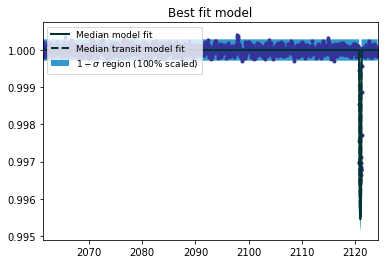

In [35]:
st.RunMCMC()

Now let's save the MCMC samples and plot the MCMC result:

In [39]:
st.SaveMCMC()

203311200 Plotting MCMC corner


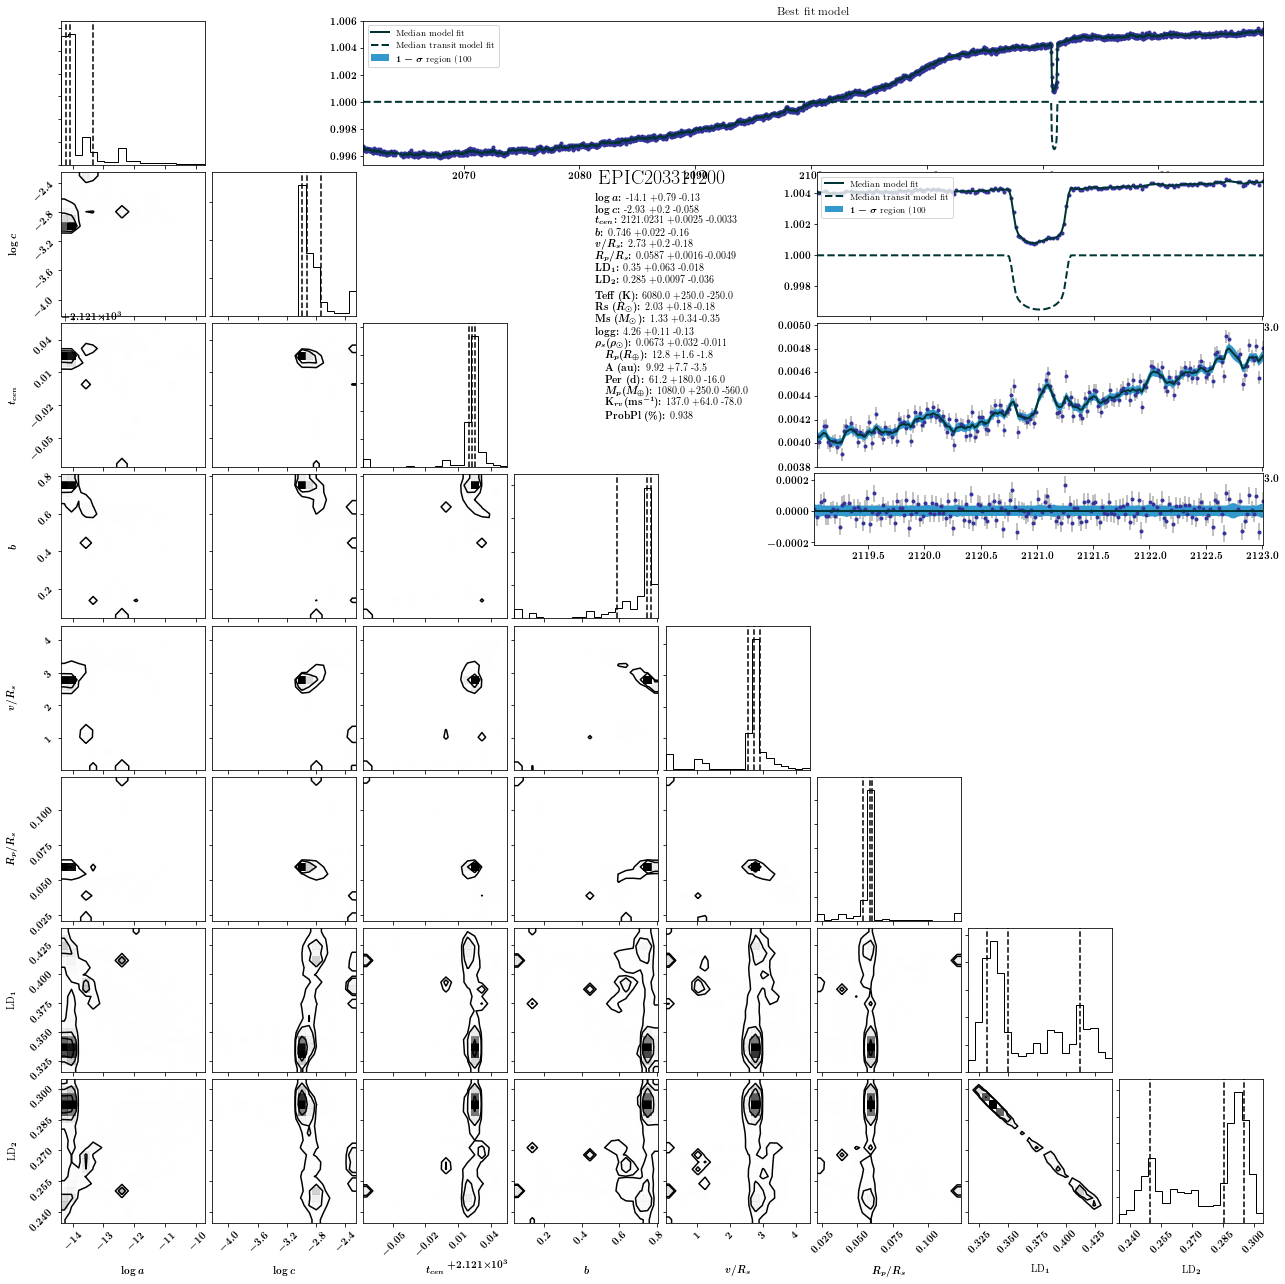

In [45]:
st.PlotMCMC()

# Without GPs:

In [77]:
st_nogp=namaste.Star('203311200',namaste.Settings(nsteps=1000,nthreads=4,mission='K2'))

st_nogp.settings.update(GP=False)
st_nogp.settings.update(verbose=False)

2018-10-20 18:11:56,237 INFO 122:namaste.py(50345) - 203311200 - initialising Star object
INFO:namaste:203311200 - initialising Star object


In [78]:
#Or you can use a csv file, for example:
st_nogp.csvfile_dat('ExampleData/EPIC203311200_beststelpars.csv')

#Initialising LDs:
st_nogp.initLD()

2018-10-20 18:11:56,943 INFO 156:namaste.py(50345) - 203311200 - Getting information from csv
INFO:namaste:203311200 - Getting information from csv
/Users/hosborn/Postdoc/K2/Namaste_2/namaste/namaste.py:158: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df=pd.DataFrame.from_csv(file)


In [79]:
#Adding a lightcurve:
st_nogp.addLightcurve('/Volumes/CHEOPS/K2_MONOS/BestLCs/EPIC203311200_bestlc_ev.npy')

(3515, 3)


/Users/hosborn/Postdoc/K2/Namaste_2/namaste/namaste.py:1289: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  kicdat=pd.DataFrame.from_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2targets&where=epic_number=%27"+str(int(kic))+"%27")


In [80]:
#When we're not doing GPs, lets flatten the LC:
st_nogp.Lcurve.lc=st_nogp.Lcurve.flatten()

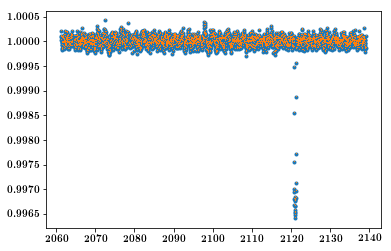

In [81]:
plt.plot(st_nogp.Lcurve.lc[:,0],st_nogp.Lcurve.lc[:,1],'.')
plt.plot(st_nogp.Lcurve.lc[st_nogp.Lcurve.lcmask,0],st_nogp.Lcurve.lc[st_nogp.Lcurve.lcmask,1],',')

2018-10-20 18:23:27,634 INFO 1023:namaste.py(50345) - 203311200.1 - monopriors: mean:tcen - [2120.87, 2121.17] , mean:b - [0.0, 1.25] , mean:vel - [0, 5.4903083994500745, 'normlim', 3.5736491649686775, 0.3833318468962794] , mean:RpRs - [0.02, 0.25] , mean:LD1 - [0, 1.0, 'gaussian', 0.339679200660016, 0.038476153186633194] , mean:LD2 - [0, 1.0, 'gaussian', 0.295936861708641, 0.022151103527701013]
INFO:namaste:203311200.1 - monopriors: mean:tcen - [2120.87, 2121.17] , mean:b - [0.0, 1.25] , mean:vel - [0, 5.4903083994500745, 'normlim', 3.5736491649686775, 0.3833318468962794] , mean:RpRs - [0.02, 0.25] , mean:LD1 - [0, 1.0, 'gaussian', 0.339679200660016, 0.038476153186633194] , mean:LD2 - [0, 1.0, 'gaussian', 0.295936861708641, 0.022151103527701013]
2018-10-20 18:23:27,642 INFO 1025:namaste.py(50345) - 203311200.1 - nll init: 2375.783092262186
INFO:namaste:203311200.1 - nll init: 2375.783092262186
2018-10-20 18:23:52,916 INFO 1048:namaste.py(50345) - 203311200.1 - mono opt, Best Results:2

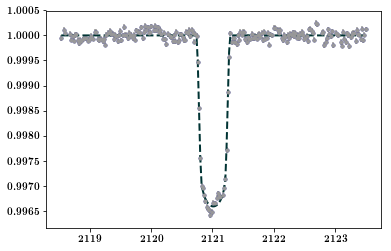

In [88]:
#Adds this to mono1
st_nogp.AddMonotransit(2121.02,0.5,0.0032,name='mono1')

#Now we have our mean-functions (eg transit models) added, we need to build the priors and the model:
st_nogp.BuildMeanPriors()

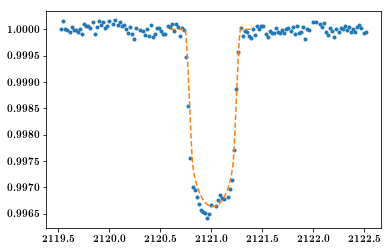

In [90]:
#Accessing pure transit fit:

st_nogp.BuildMeanModel()
model=st_nogp.meanmodel_comb.get_value(np.arange(2120.6,2121.4,0.005))
plt.plot(st_nogp.Lcurve.lc[abs(st_nogp.Lcurve.lc[:,0]-st_nogp.mono1.tcen)<1.5,0],st_nogp.Lcurve.lc[abs(st_nogp.Lcurve.lc[:,0]-st_nogp.mono1.tcen)<1.5,1],'.')
plt.plot(np.arange(2120.6,2121.4,0.005),model,'--')

2018-10-20 18:32:10,375 INFO 524:namaste.py(50345) - 203311200 - Priors set as mean:tcen - [2120.87, 2121.17] , mean:b - [0.0, 1.25] , mean:vel - [0, 5.4903083994500745, 'normlim', 3.5736491649686775, 0.3833318468962794] , mean:RpRs - [0.02, 0.25] , mean:LD1 - [0, 1.0, 'gaussian', 0.339679200660016, 0.038476153186633194] , mean:LD2 - [0, 1.0, 'gaussian', 0.295936861708641, 0.022151103527701013]
INFO:namaste:203311200 - Priors set as mean:tcen - [2120.87, 2121.17] , mean:b - [0.0, 1.25] , mean:vel - [0, 5.4903083994500745, 'normlim', 3.5736491649686775, 0.3833318468962794] , mean:RpRs - [0.02, 0.25] , mean:LD1 - [0, 1.0, 'gaussian', 0.339679200660016, 0.038476153186633194] , mean:LD2 - [0, 1.0, 'gaussian', 0.295936861708641, 0.022151103527701013]
2018-10-20 18:32:10,638 INFO 571:namaste.py(50345) - 203311200 - EMCEE HAPPENING. INIT DISTS:
INFO:namaste:203311200 - EMCEE HAPPENING. INIT DISTS:
2018-10-20 18:32:10,640 INFO 572:namaste.py(50345) - 2033112002120.994080992583 , 0.460224993793

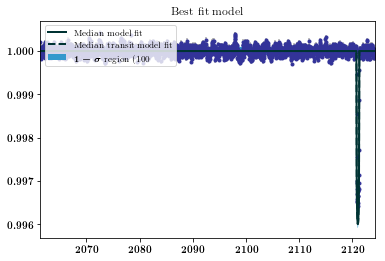

In [91]:
st_nogp.RunMCMC()

In [94]:
st_nogp.SaveMCMC(suffix='NoGP',overwrite=True)

2018-10-20 18:47:42,878 INFO 656:namaste.py(50345) - 203311200 - Plotting MCMC corner
INFO:namaste:203311200 - Plotting MCMC corner


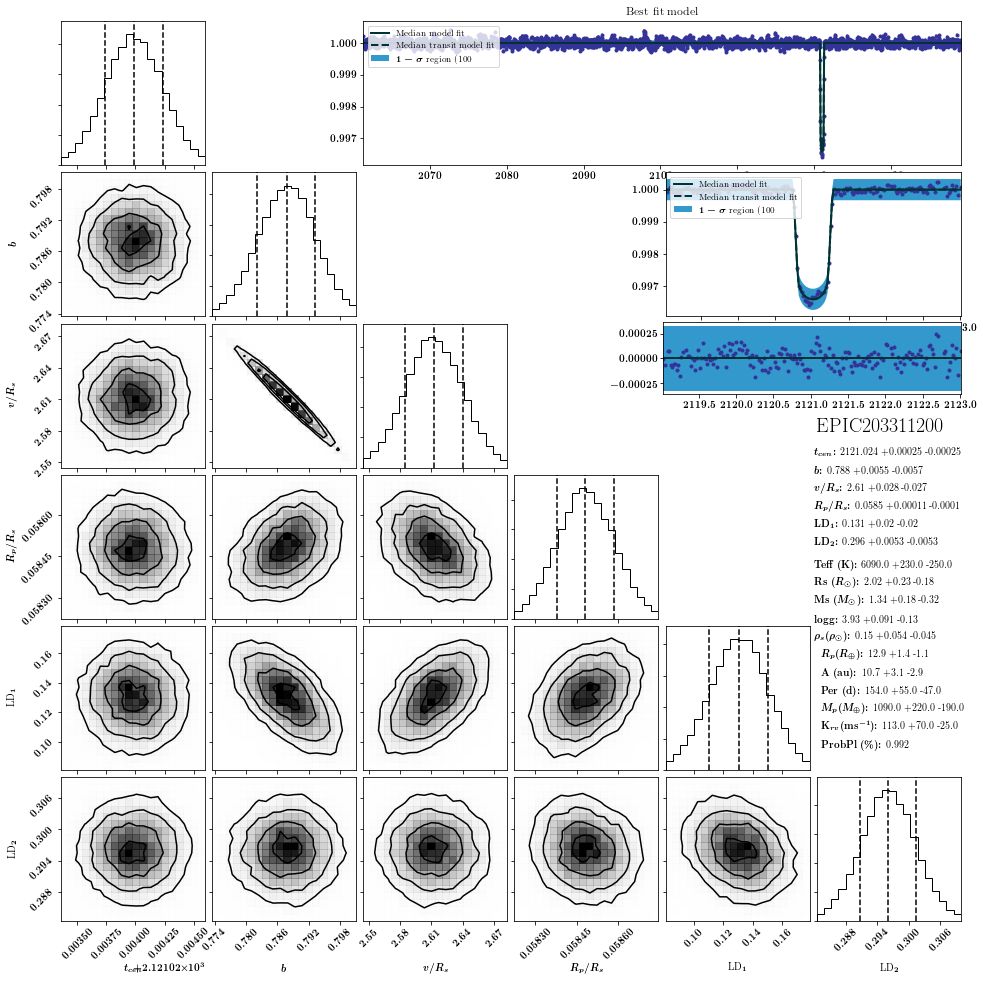

In [99]:
st_nogp.PlotMCMC(suffix='NoGP')